<a href="https://colab.research.google.com/github/Erifai/Facial_Recognition_Emotions_CNN_MLP/blob/main/Facial_Recognition_Emotions_CNN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Activation, Dense
import matplotlib.pyplot as plt


def preview_classes(X,y, class_names, nbr_examples_per_class = 10, nbr_classes = 7):

    fig, axes = plt.subplots(nbr_classes, nbr_examples_per_class+1, 
                             figsize = (1*nbr_examples_per_class, 1*nbr_classes))
    
    for i in range(nbr_classes):
        y_df = pd.DataFrame({'y':y})
        class_i_random_pick = np.random.choice(y_df[y_df.y == i].index, nbr_examples_per_class, replace = False)
        
        #Class Name
        axes[i, 0].text(0,0.5, class_names[i],  dict(size = 10))
        axes[i, 0].axis('off')

        for j,idx in enumerate(class_i_random_pick):
            img = X[idx]
            axes[i,j+1].imshow(img, cmap = 'gray')
            axes[i,j+1].axis('off')





In [7]:
def load_data(data_path):  
    """
    Load and Split Data
    """
    with open(data_path) as f:
        content = f.readlines()
        
    lines = np.array(content)
    del content #free memory space
    n = len(lines)
     
    X_train, y_train, X_test, y_test = [], [], [], []
    for i in range(n):
        try:
            emotion, img, data_usage = lines[i].split(",")
            val = img.split(" ")
            pixels = np.array(val, 'float32')
            img = np.array(pixels)
            img = img.reshape((48,48))

            if 'Training' in data_usage:
                y_train.append(int(emotion))
                X_train.append(img)
            elif 'PublicTest' in data_usage:
                y_test.append(int(emotion))
                X_test.append(img)
        except Exception as e:
            print("Oups Something Went Wrong ", e)
    
    return X_train, y_train, X_test, y_test




Oups Something Went Wrong  could not convert string to float: 'pixels'
Oups Something Went Wrong  not enough values to unpack (expected 3, got 2)


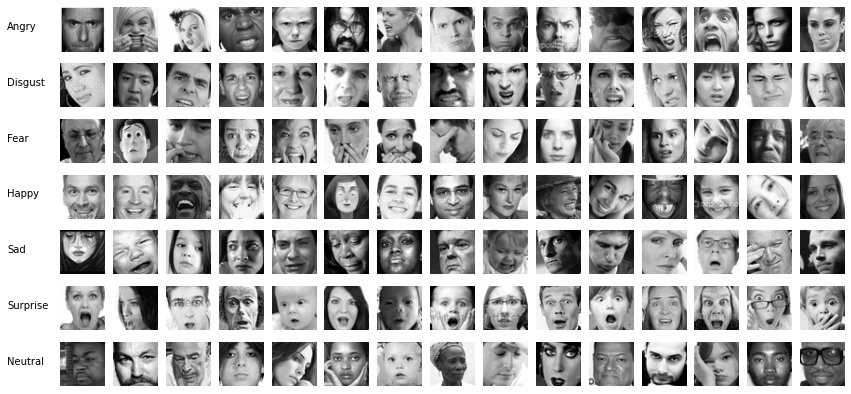

In [8]:
#-------------------------------------------------------------------

data_path = 'facial_expression_dataset.csv'
class_names = ["Angry", "Disgust","Fear","Happy","Sad","Surprise","Neutral"]

X_train, y_train, X_test, y_test = load_data(data_path)

"""
Preview Data
"""
preview_classes(X_train,y_train, class_names, nbr_examples_per_class = 15, nbr_classes = 7)

#--------------------------------------------------------------------

In [10]:
""" CNN """
#the input layer
input_layer = Input(shape =(48,48,1))
#1st Conv Layer
x = Conv2D(64,(3,3),activation='relu')(input_layer)

#2nd Conv Layer
x = Conv2D(32,(4,4),activation='relu')(x)
#1st MaxPooling

#1st Conv Layer
x = Conv2D(16,(5,5),activation='relu')(x)

#2nd Conv Layer
x = Conv2D(8,(6,6),activation='relu')(x)
#1st MaxPooling
x = MaxPooling2D(pool_size =(2,2),strides =(2,2))(x)

#MLP 

x = Flatten()(x)
x = Dense(units = 64,activation = 'relu')(x)
x = Dense(units = 32 ,activation = 'relu')(x)
output_layer = Dense(units = 7,activation = 'softmax')(x)

MyModel = Model(input_layer,output_layer)
MyModel.summary()


MyModel.compile(loss = 'sparse_categorical_crossentropy', 
                                   optimizer = 'rmsprop',
                                   metrics = ['accuracy'])
X_train_std = np.array(X_train)
y_train_std = np.array(y_train)

earlystopper = EarlyStopping(monitor = 'val_loss', patience = 3)
MyModel.fit(X_train_std, y_train_std, batch_size = 60, epochs = 30, validation_split = 0.2,  callbacks = [earlystopper])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 43, 32)        32800     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 16)        12816     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 8)         4616      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2312)              0     